# 강의안 11. 모형 타당성 검토 (Model validation)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  iris data 읽어들여 분석하기

In [2]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 지도학습: test 데이터셋을 이용한 타당성 검증

In [3]:
# 1. Choose a class of model : BaussianNB
from sklearn.naive_bayes import GaussianNB

In [25]:
GNB = GaussianNB()

In [5]:
#  3. Arrange data set: split training and test sets
X_iris = iris.drop('species', axis =1)
y_iris = iris['species']

#### training, test 데이터 셋 구분하기

In [15]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris) #패킹 언패킹

In [16]:
Xtrain

,sepal_length,sepal_width,petal_length,petal_width
141,6.9,3.1,5.1,2.3
93,5.0,2.3,3.3,1.0
131,7.9,3.8,6.4,2.0
23,5.1,3.3,1.7,0.5
11,4.8,3.4,1.6,0.2
...,...,...,...,...
88,5.6,3.0,4.1,1.3
30,4.8,3.1,1.6,0.2
4,5.0,3.6,1.4,0.2
137,6.4,3.1,5.5,1.8


In [17]:
ytrain

141     virginica
93     versicolor
131     virginica
23         setosa
11         setosa
          ...    
88     versicolor
30         setosa
4          setosa
137     virginica
84     versicolor
Name: species, Length: 112, dtype: object

In [18]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 1 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  38 non-null     float64
 1   sepal_width   38 non-null     float64
 2   petal_length  38 non-null     float64
 3   petal_width   38 non-null     float64
dtypes: float64(4)
memory usage: 1.5 KB


#### train 데이터셋을 이용한 모형 학습

In [19]:
GNB.fit(Xtrain, ytrain)

GaussianNB()

In [20]:
ytrain_pred = GNB.predict(Xtrain)

#### training dataset 내에서 accuracy 분석하기

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(ytrain, ytrain_pred)

0.9642857142857143

In [22]:
# training dataset 내에서 score()메서드를 이용하여 accuracy 계산하기
GNB.score(Xtrain, ytrain)

0.9642857142857143

#### test dataset에서 예측하고 accuracy 분석하기

In [23]:
# 5. Predict labels for unknown(test) data 
ypred = GNB.predict(Xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred) #안썼던 y값을 가지고 y값 추측
#값은 계속 달라짐:

0.9473684210526315

### 교차 타당성 분석 (Cross Validation)

In [24]:
from sklearn.model_selection import cross_validate, cross_val_score

In [37]:
GNB = GaussianNB()

In [38]:
scores = cross_val_score(GNB, X_iris, y_iris)
scores

array([0.93333333, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [39]:
scores.mean()

0.9533333333333334

In [40]:
scores = cross_val_score(GNB, X_iris, y_iris, cv=10) #10번 교차검증하라
scores

array([0.93333333, 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.86666667, 1.        , 1.        , 1.        ])

In [41]:
scores.mean()

0.9533333333333334

## Hyperparameter 설정에 대한 모형의 타당성 검토

### 비지도 학습: clustering of Iris dataset without test data set

In [42]:
from sklearn.neighbors import KNeighborsClassifier    # choose model class: 분류를 위하여 Knn 방법을 사용함 

In [43]:
knn = KNeighborsClassifier()                            # Initiate a model: n_neighbors =5 (default)

In [44]:
knn.fit(X_iris, y_iris)                               # fit the model with data with labels!

KNeighborsClassifier()

In [45]:
y_pred = knn.predict(X_iris)                         
y_pred

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
     

모델의 성능을 검증하기 위하여 metrics모듈의 accuracy_score 함수를 사용함

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_iris, y_pred)

0.9666666666666667

hyperparameter n_neighbor=1로 설정한 경우 모형의 성능을 비교함

In [48]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_iris, y_iris)
y_pred = knn.predict(X_iris)
accuracy_score(y_iris, y_pred)

1.0

hyperparameter n_neighbor=15로 설정한 경우 모형의 성능을 비교함

In [49]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_iris, y_iris)
y_pred = knn.predict(X_iris)
accuracy_score(y_iris, y_pred)

0.9866666666666667

### Model Validation by Train -Test data split 

train 데이터셋과 test 데이터셋을 구분하기 위하여 model_selection 모듈의 train_test_split 함수를 사용함

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris)

hyperparameter n_neighbor=5로 설정한 경우

In [75]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9473684210526315

hyperparameter n_neighbor=1로 설정한 경우

In [76]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.8947368421052632

hyperparameter n_neighbor=15로 설정한 경우

In [77]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

hyperparameter n_neighbor=5로 설정한 경우 (여러번 반복할 경우 accuracy값이 다르게 나타난다.)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9736842105263158

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

### Cross Validation

In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
knn = KNeighborsClassifier(n_neighbors=5)
cross_val_score(knn, X_iris, y_iris, cv=5)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [83]:
cross_val_score(knn, X_iris, y_iris, cv=10).mean()

0.9666666666666668

In [84]:
knn = KNeighborsClassifier(n_neighbors=1)
cross_val_score(knn, X_iris, y_iris, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [85]:
cross_val_score(knn, X_iris, y_iris, cv=10).mean()

0.96

In [86]:
knn = KNeighborsClassifier(n_neighbors=15)
cross_val_score(knn, X_iris, y_iris, cv=5)

array([0.93333333, 1.        , 0.93333333, 0.96666667, 1.        ])

In [88]:
cross_val_score(knn, X_iris, y_iris, cv=10).mean()

0.9733333333333334

## Decision Tree

In [89]:
from sklearn import tree

iris 데이터셋에 decision tree 방식을 적용함

In [90]:
DT = tree.DecisionTreeClassifier()
DT.fit(X_iris, y_iris)

DecisionTreeClassifier()

In [91]:
DT.score(X_iris, y_iris)

1.0

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

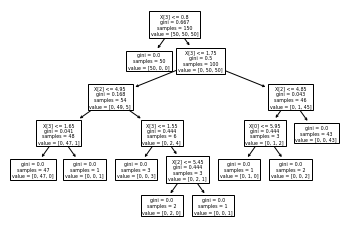

In [92]:
tree.plot_tree(DT)

In [93]:
import graphviz

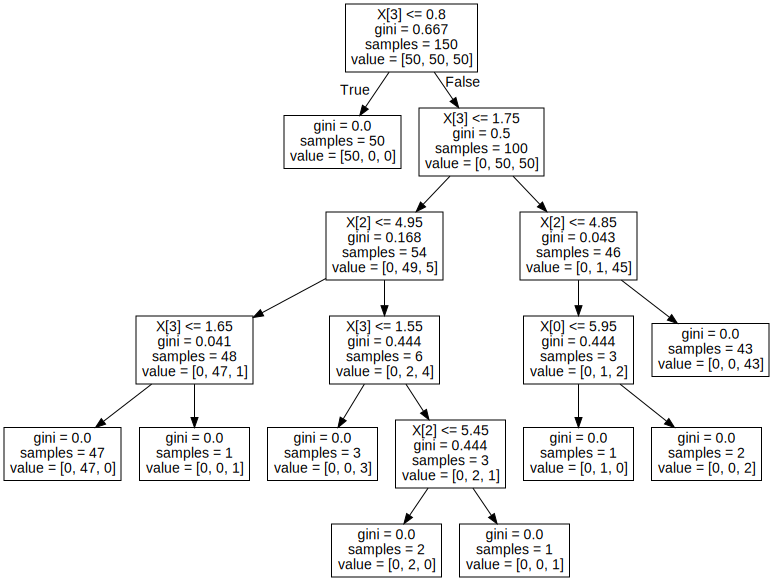

In [94]:
dot_data = tree.export_graphviz(DT, out_file=None)
graph = graphviz.Source(dot_data)
graph

train-test 데이터셋을 구분하여 예측 정확도를 파악함

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris)

In [132]:
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [133]:
DT.score(X_train, y_train)

1.0

In [134]:
DT.score(X_test, y_test)

0.9473684210526315

#### max_leaf_nodes 매개변수를 지정한 경우 (overfitting을 방지)

In [135]:
DT = tree.DecisionTreeClassifier(max_leaf_nodes=5)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=5)

In [136]:
DT.score(X_train, y_train)

0.9821428571428571

In [137]:
DT.score(X_test, y_test)

0.9736842105263158

Cross Validation  방법을 이용한 결과

In [138]:
DT = tree.DecisionTreeClassifier()
cross_val_score(DT, X_iris, y_iris, cv=5)

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

In [139]:
cross_val_score(DT, X_iris, y_iris, cv=5).mean()

0.9666666666666668

##  RandomForests

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
RF = RandomForestClassifier()
RF.fit(X_iris, y_iris)

RandomForestClassifier()

In [142]:
RF.score(X_iris, y_iris)

1.0

train-test 데이터셋을 이용한 경우

In [143]:
RF= RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [144]:
RF.score(X_test, y_test)

0.9736842105263158

Cross Validation 방식을 이용한 경우

In [145]:
RF = RandomForestClassifier()
cross_val_score(RF, X_iris, y_iris, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [146]:
cross_val_score(RF, X_iris, y_iris, cv=5).mean()

0.9666666666666668